# IS 597: Final Project
# Project: Analysis of Hate Crimes during COVID-19 Pandemic
## Python version: 3.9
## Author:
## (1) Ritesh Rajput | riteshr2@illinois.edu
##         (2) Nishit Singh | ns1601@illinois.edu

### Libraries

In [1]:
import os
import pandas as pd
import warnings
import numpy as np
import visualize as vis
import matplotlib.pyplot as plt
%matplotlib inline

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

### Function: get_data() is used to read all the requested dataset from the data folder, clean the data and return a dataframe

In [2]:
def get_data(file_name, all_df=[]):
    """
    Function to read the data files, create a concatenated dataframe
    :param file_name: Name of the the folder to read
    :param all_df: Initializing list to collect all dataframe created
    :return: Concatenated dataframe
    """
    files = os.listdir('./data/' + file_name + '')  # Files available in the directory
    print(files)
    for file in range(len(files)):
        if file_name == 'population':  # Reading all files from folder named "population"
            # Splitting year from filename to include as a column in dataframe
            year = int(files[file].split('_')[1].split('.')[0])
            df = files[file]
            df = pd.read_csv('data/' + file_name + '/' + files[file] + '', skiprows=2)
            df['Year'] = year
            indexNames = df[df['Location'] == 'Notes'].index[0]
            df = df.iloc[:indexNames - 1, :]  # Removing extra rows
            df.drop(df.index[df['Location'] == 'United States'], inplace=True)  # Dropping the total row
            # df['Black'] = df['Black'].fillna(0)
            df = df.fillna(0)
            df.drop(df.index[df['Black'] == '<.01'], inplace=True)
            df['Black'] = df['Black'].astype('float')
            all_df.append(df)

        elif file_name == 'unemployment':
            # Splitting year from filename to include as a column in dataframe
            state = files[file].split('.')[0]
            df = files[file]
            df = pd.read_excel('data/' + file_name + '/' + files[file] + '', skiprows=10)
            df['state'] = state
            indexNames = df[df['Year'] == 2021.0].index[0]
            # Dropping the rows containing data of year 2021 since we are considering previous 10 years data (2011-2020)
            df = df.iloc[:indexNames - 1, :]
            # Filtering the required columns
            df = df[['Year', 'unemployment', 'state']]
            all_df.append(df)

        elif file_name == 'hatecrime':
            df = files[file]
            df = pd.read_csv('data/' + file_name + '/' + files[file] + '')
            startIndex = df[df['DATA_YEAR'] == 2011].index[0]
            df = df.iloc[startIndex:, :]  # Removing rows with year earlier than 2011
            hatecrime_drop_columns = ['INCIDENT_ID', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT', 'DIVISION_NAME',
                                      'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'INCIDENT_DATE',
                                      'ADULT_VICTIM_COUNT',
                                      'JUVENILE_VICTIM_COUNT', 'JUVENILE_OFFENDER_COUNT', 'TOTAL_OFFENDER_COUNT',
                                      'ADULT_OFFENDER_COUNT', 'JUVENILE_OFFENDER_COUNT', 'OFFENSE_NAME',
                                      'TOTAL_INDIVIDUAL_VICTIMS',
                                      'LOCATION_NAME', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS']

            df = df.drop(hatecrime_drop_columns, axis=1)  # Dropping columns which are not required
            all_df.append(df)
            # hatecrime_filter_df = df[['DATA_YEAR', 'STATE_NAME', 'REGION_NAME', 'OFFENDER_RACE', 'VICTIM_COUNT']]
        else:
            pass
    dfs = pd.concat(all_df)
    all_df.clear()
    return dfs

['North_Carolina.xlsx', 'Ohio.xlsx', 'Pureto_Rico.xlsx', 'Illinois.xlsx', 'Louisiana.xlsx', 'Oregon.xlsx', 'New_York.xlsx', 'West_Virgina.xlsx', 'Mississippi.xlsx', 'Tennessee.xlsx', 'Nevada.xlsx', 'South_Carolina.xlsx', 'North_Dakota.xlsx', 'Montana.xlsx', 'Minnesota.xlsx', 'South_Dakota.xlsx', 'Oklahoma.xlsx', 'Vermont.xlsx', 'New_Mexico.xlsx', 'Florida.xlsx', 'Utah.xlsx', 'Kentucky.xlsx', 'Michigan.xlsx', 'Indiana.xlsx', 'Delaware.xlsx', 'Rhode_Island.xlsx', 'Connecticut.xlsx', 'Washington.xlsx', 'California.xlsx', 'Maryland.xlsx', 'Pennsylvania.xlsx', 'hawaii.xlsx', 'New_Jersey.xlsx', 'Virginia.xlsx', 'Colorado.xlsx', 'Wynoming.xlsx', 'Alabama.xlsx', 'Maine.xlsx', 'Iowa.xlsx', 'Missouri.xlsx', 'Arkansas.xlsx', 'Alaska.xlsx', 'New_Hampshire.xlsx', 'District_Of_Columbia.xlsx', 'Kansas.xlsx', 'Nebraska.xlsx', 'Massachusetts.xlsx', 'Texas.xlsx', 'Idaho.xlsx', 'Georgia.xlsx', 'Wisconsin.xlsx', 'Arizona.xlsx']
['population_2020.csv', 'population_2018.csv', 'population_2019.csv', 'populat

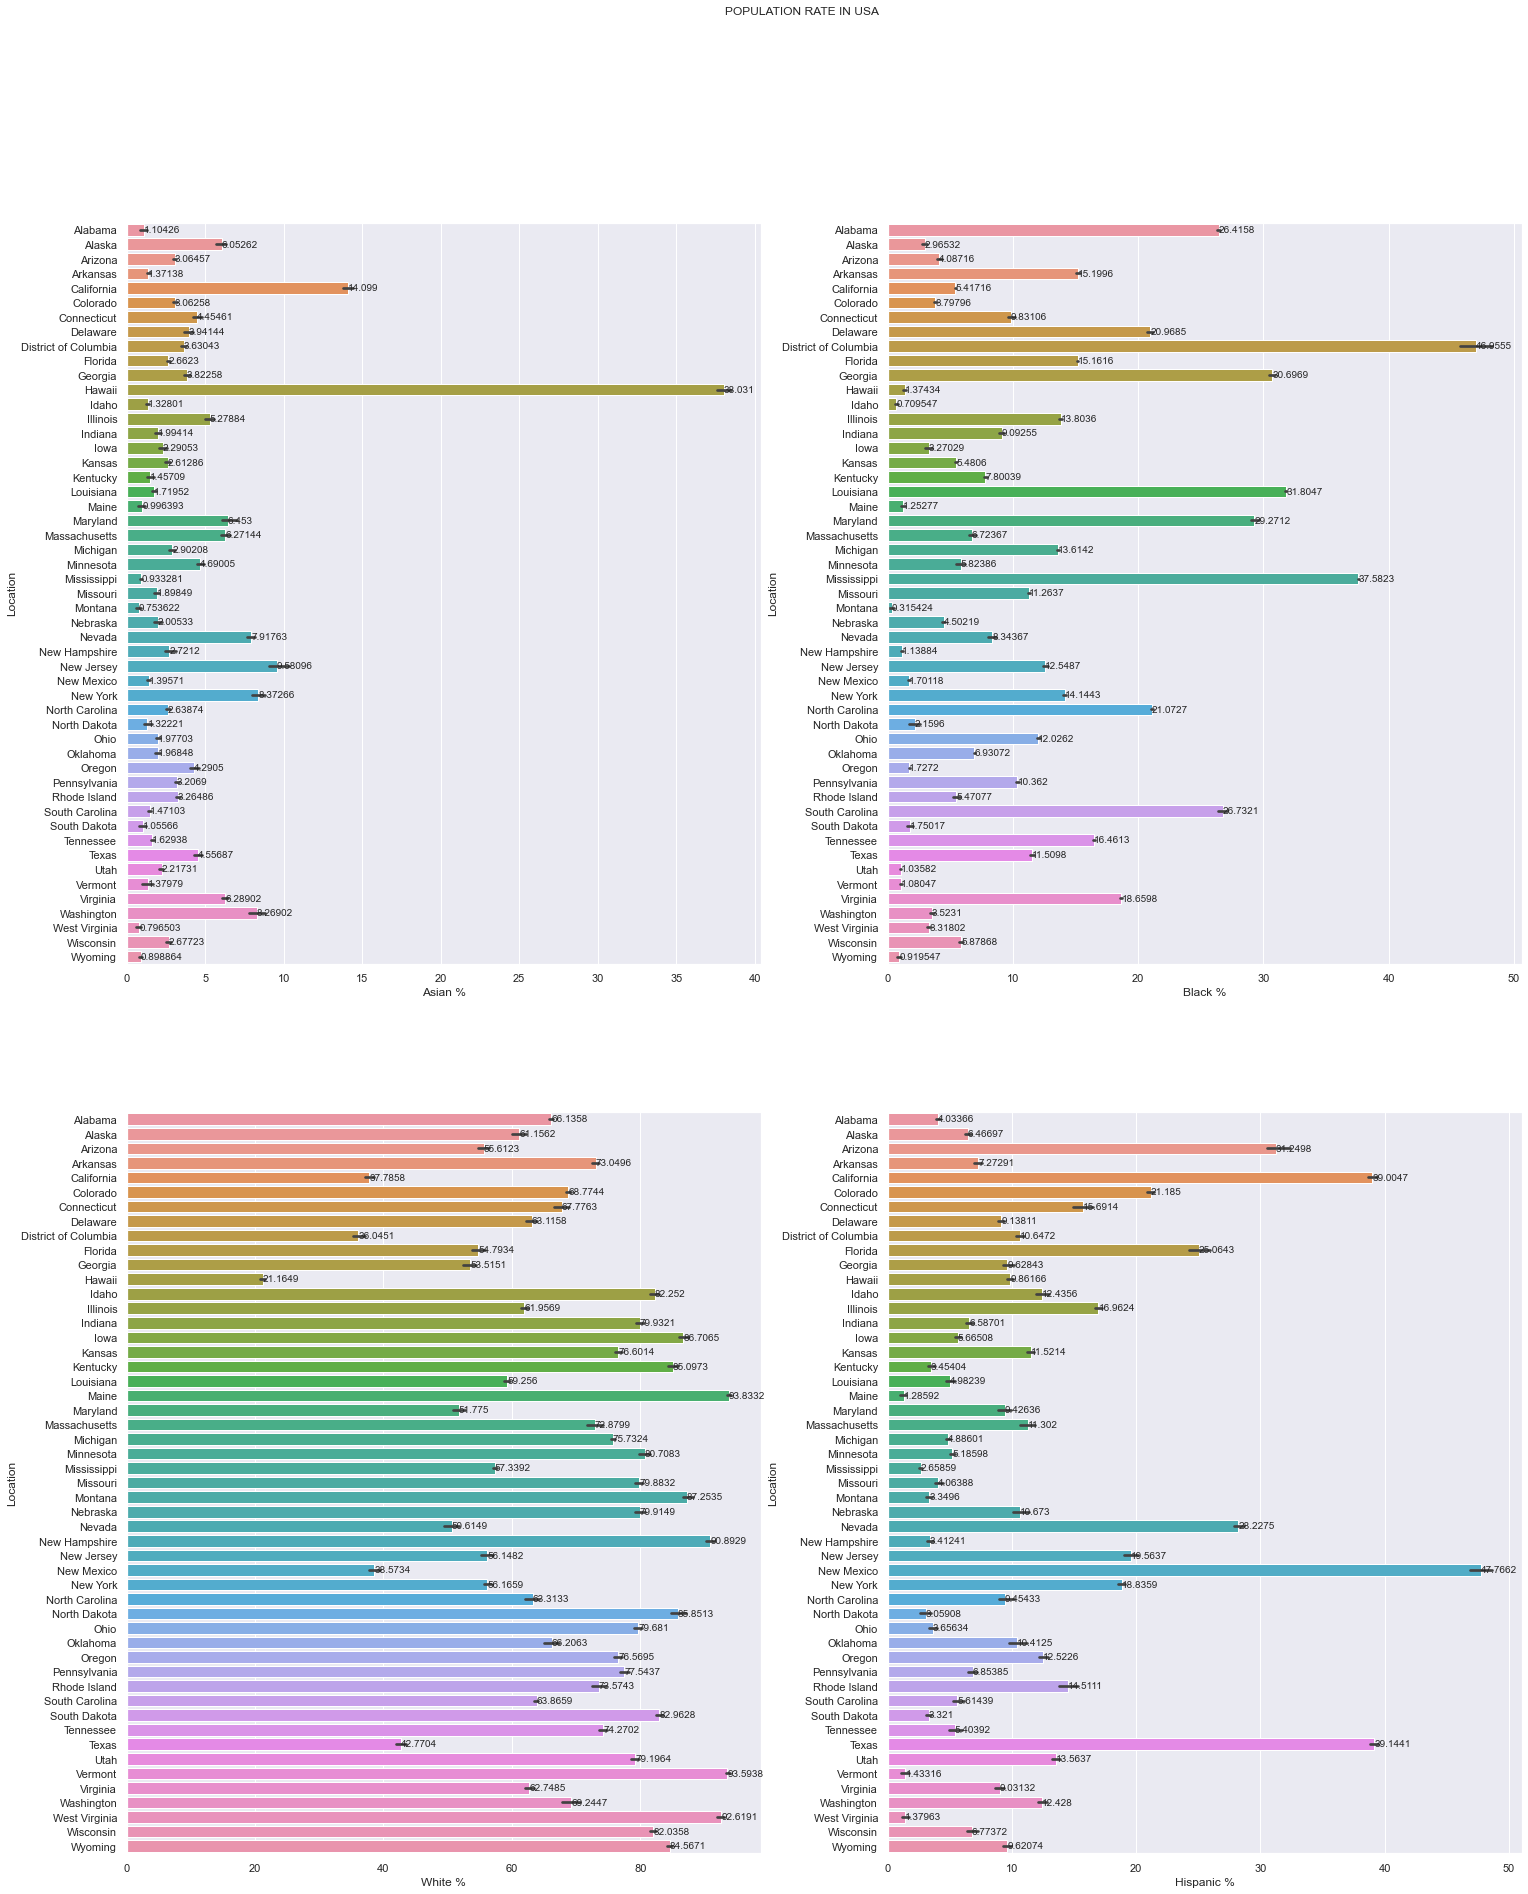

In [3]:
if __name__ == '__main__':
    # Reading data from the folder
    unemployment_df = get_data('unemployment')
    population_df = get_data('population')
    hatecrime_df = get_data('hatecrime')

    # Visualization of dataset
    population_plot = vis.visualize_population(population_df)

### The above bar plot displays different races Vs Location i.e. States. For an instance if we observe the Black % Vs Location, "Distract of Columbia" State has the highest population followed with Mississippi, Louisiana etc.

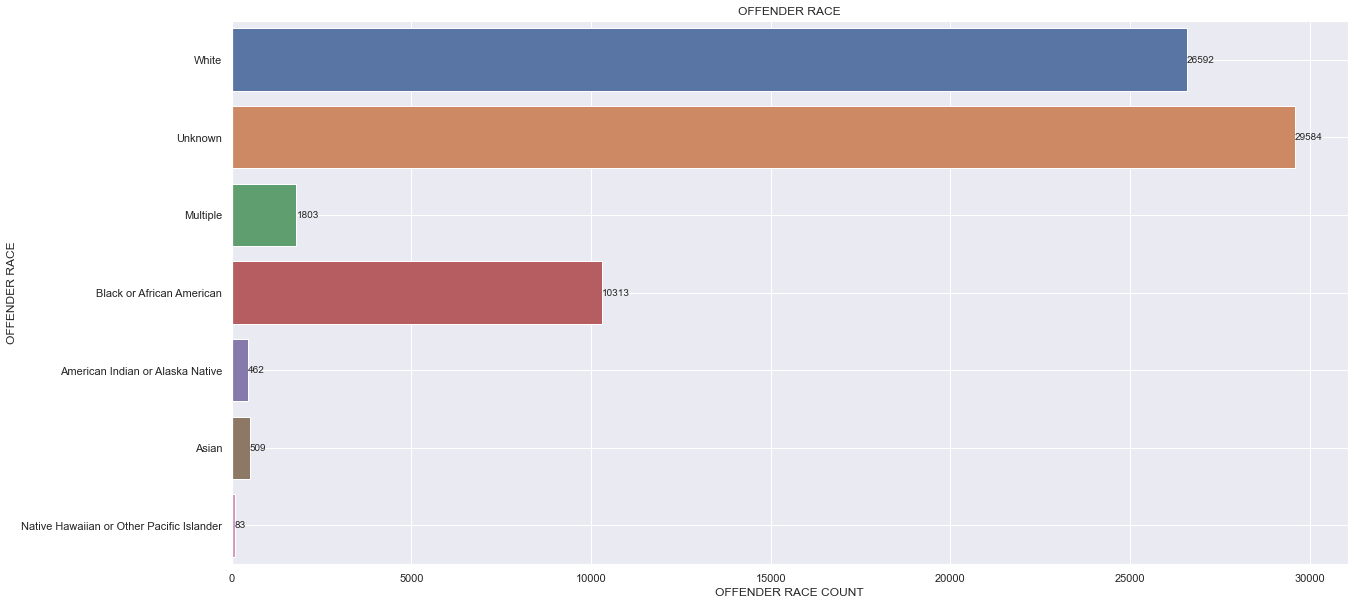

In [4]:
hatecrime_offender_plot = vis.visualize_hatecrime(hatecrime_df, 'offender race')

### The above bar chart displays offender race count Vs offender race. 

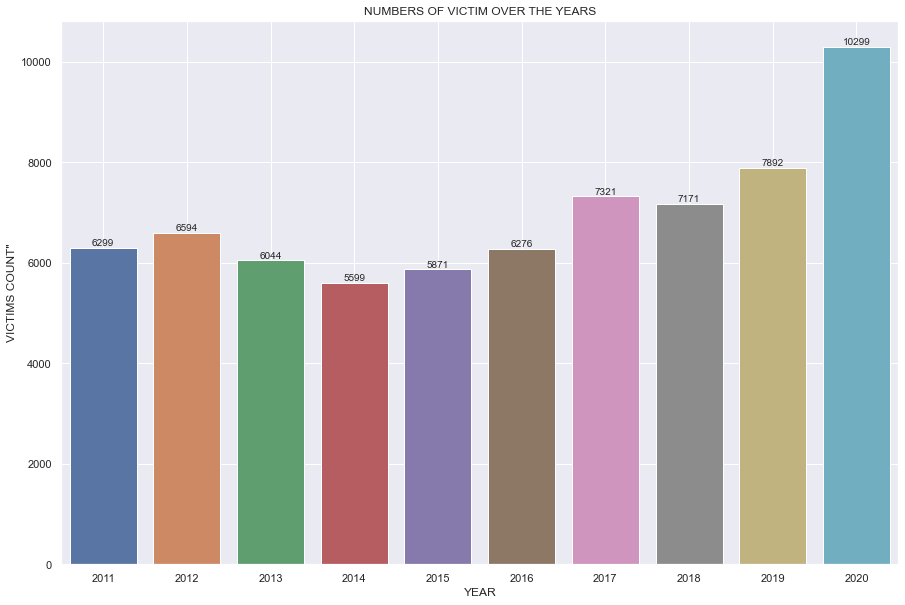

In [5]:
hatecrime_victim_count_plot = vis.visualize_hatecrime(hatecrime_df, 'victim count')

### The above bar chart displays year vs victims count. From the above chart we can observe that while the victim count from the year 2011 - 2019 averaged approximately 7000 however in the year 2020 it increased significantly more than 10000.

In [6]:
# hatecrime_antiasian_victim_count_plot = visualize_hatecrime(hatecrime_df, 'anti-asian')
# hatecrime_antiasian_victim_count_plot.show()

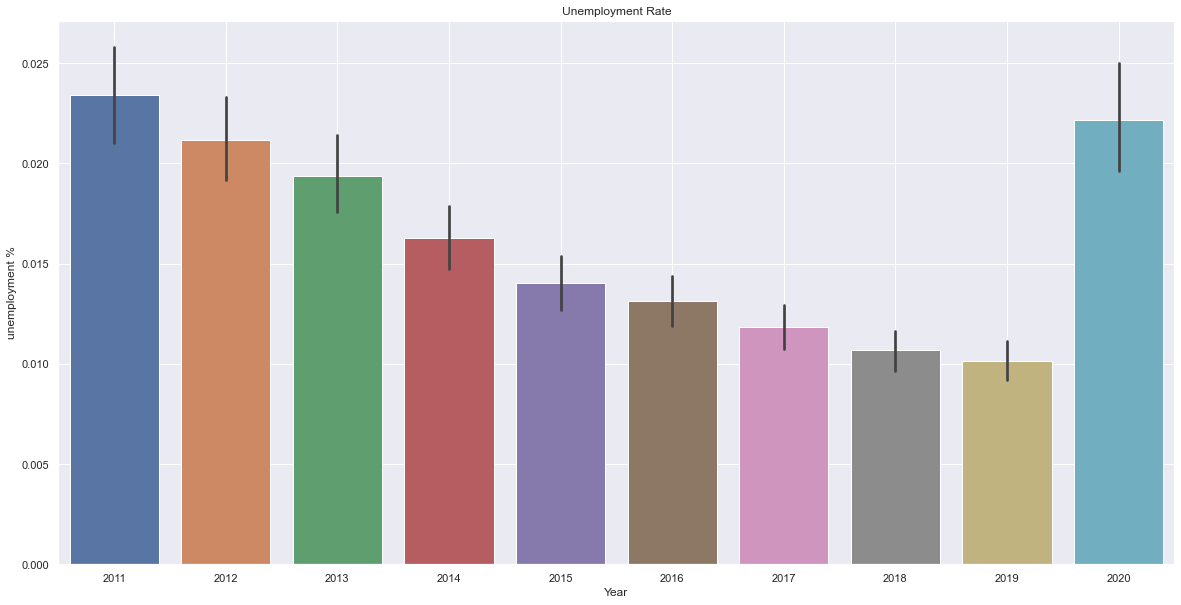

In [7]:
unemployment_plot = vis.visualize_unemployment(unemployment_df)

### The above bar chart displays Year Vs Unemployment Rate.

In [8]:
hatecrime_unemployment = hatecrime_df.merge(unemployment_df,
                                                how='inner',
                                                left_on=['DATA_YEAR', 'STATE_NAME'],
                                                right_on=['Year', 'state'])

hatecrime_population = hatecrime_df.merge(population_df,
                                              how='inner',
                                              left_on=['DATA_YEAR', 'STATE_NAME'],
                                              right_on=['Year', 'Location'])

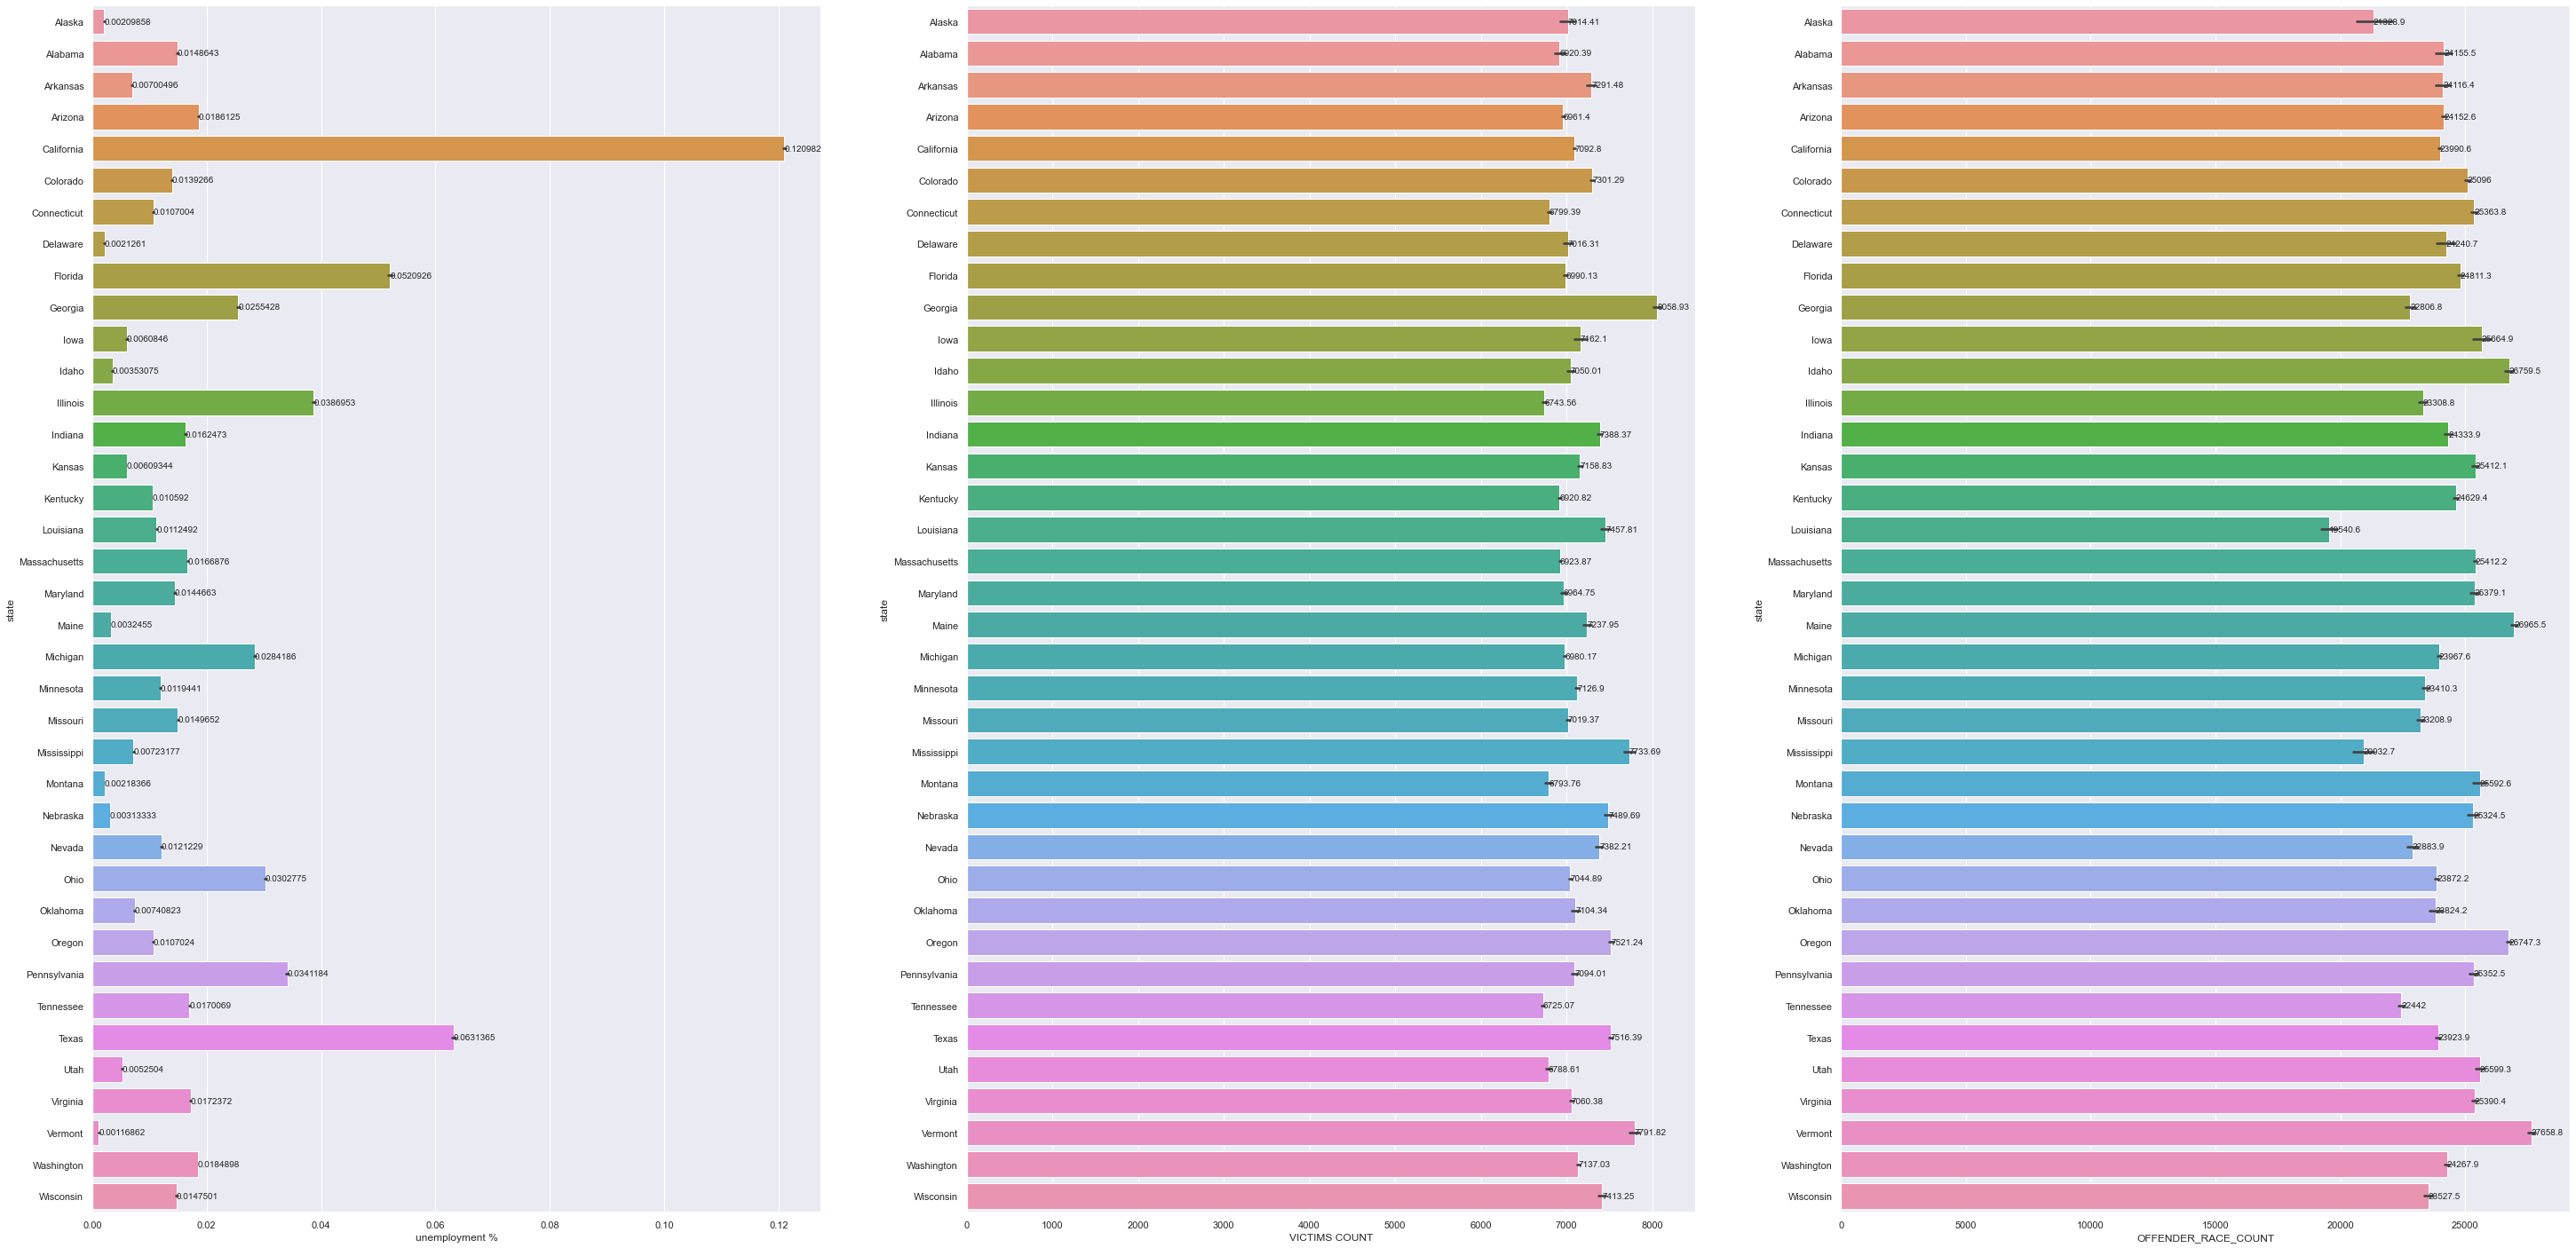

In [9]:
hatecrime_unemployment_plot = vis.visualize_hatecrime_unemployment(hatecrime_unemployment)

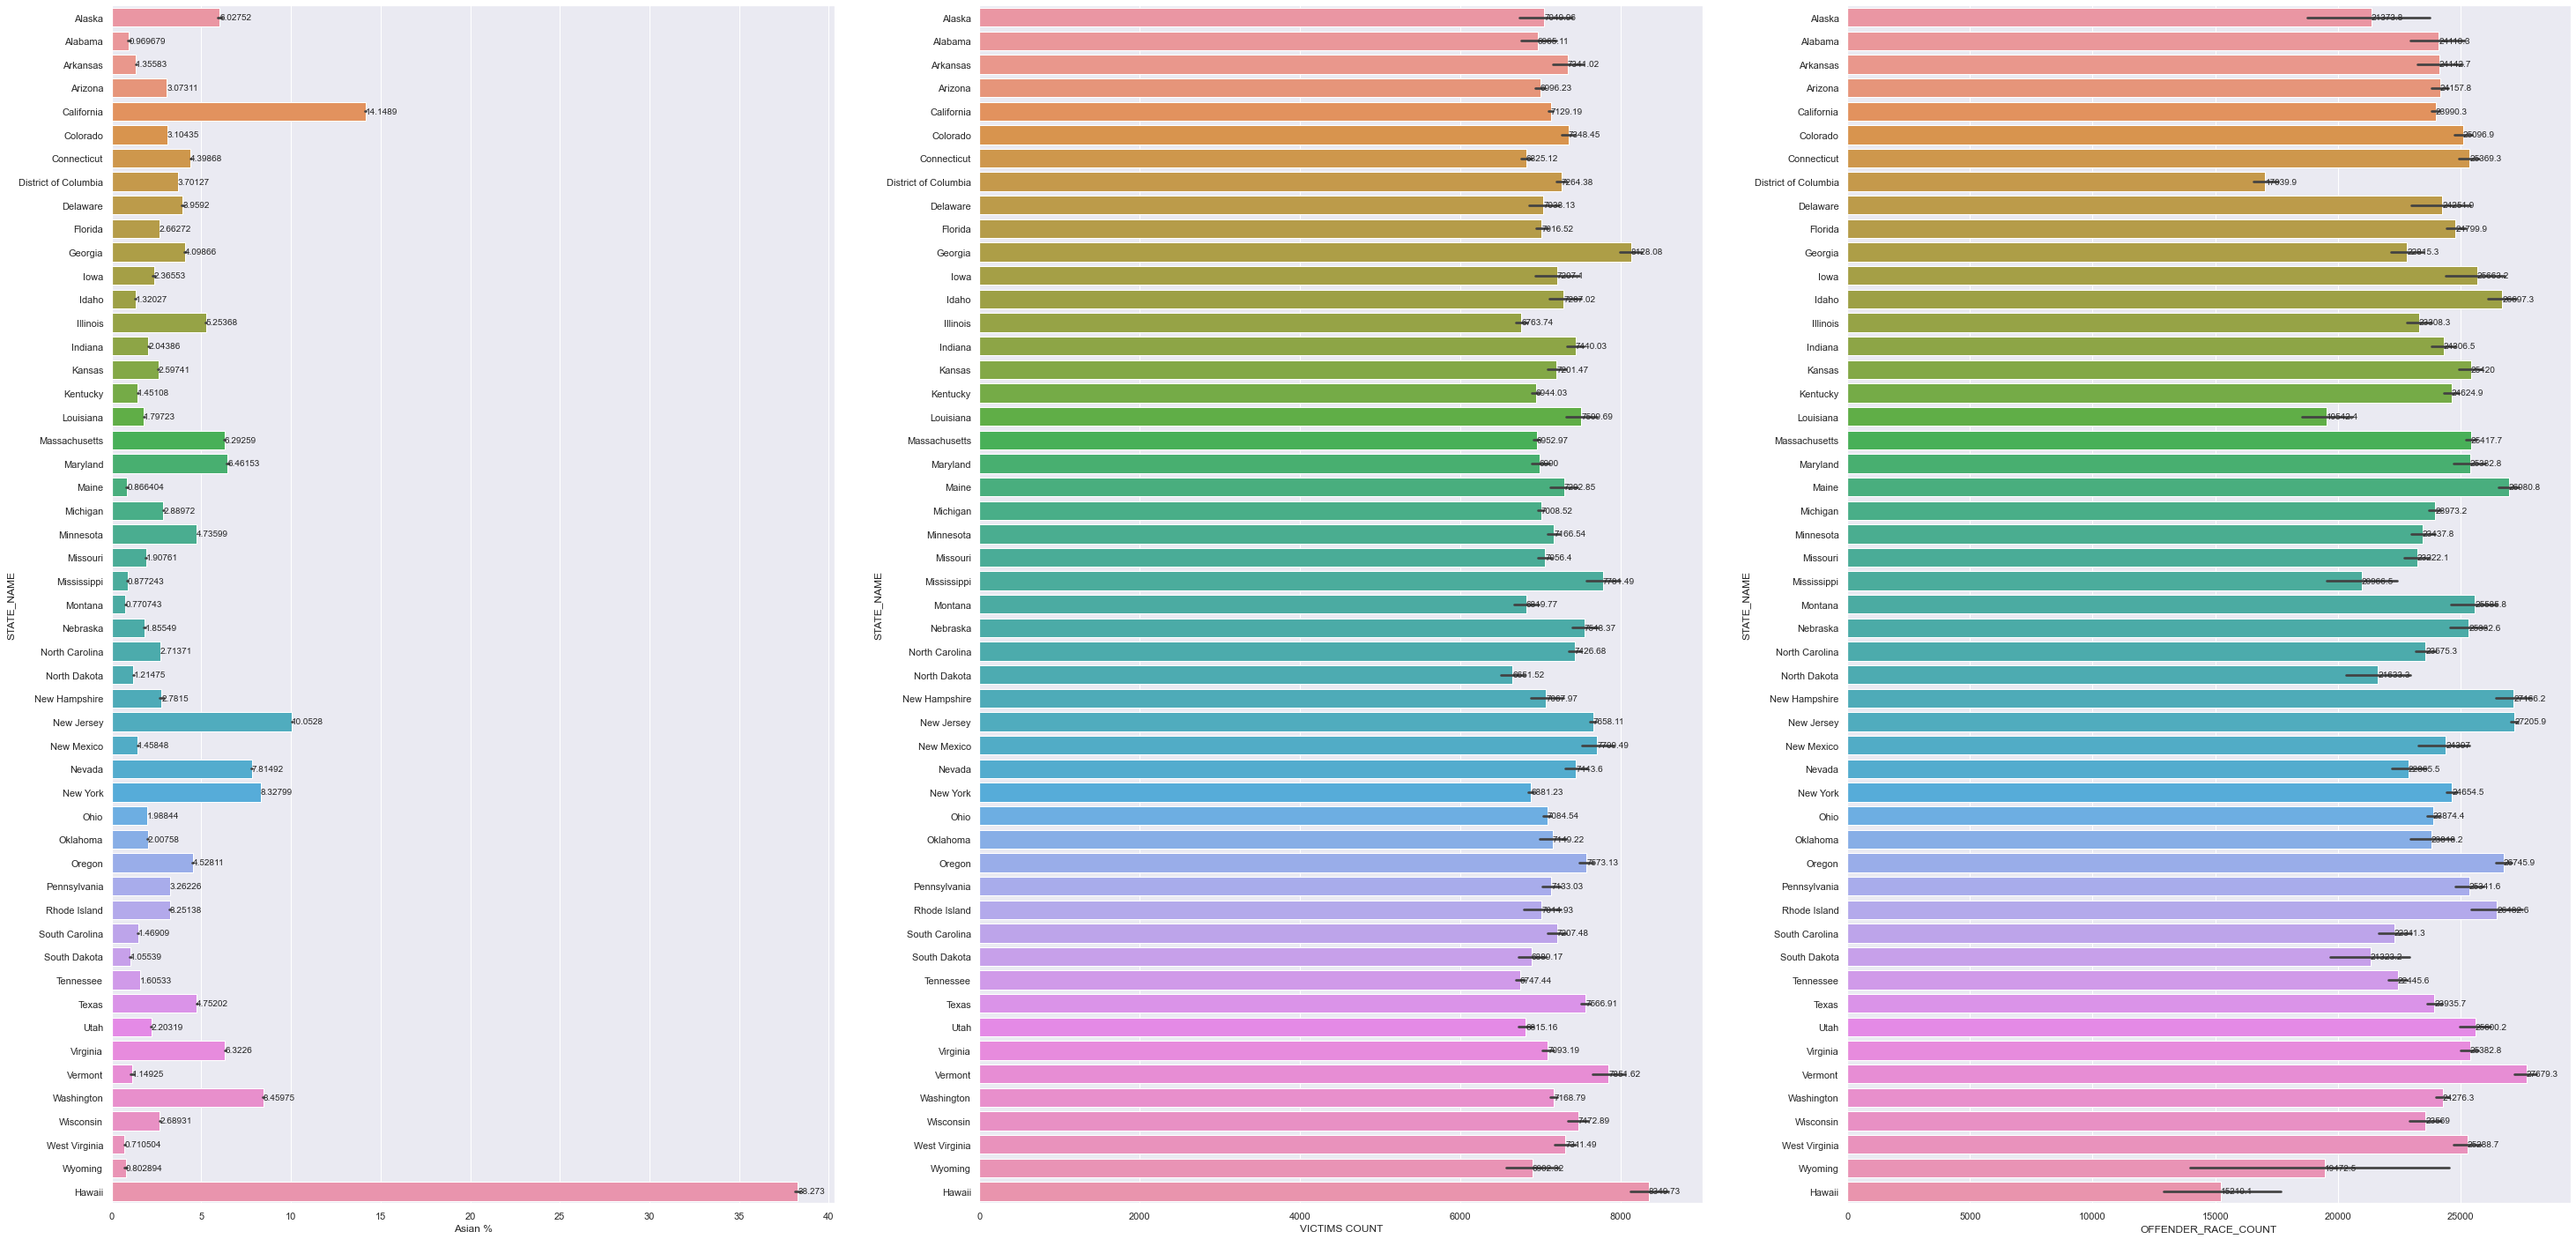

In [10]:
hatecrime_population_asian_plot = vis.visualize_hatecrime_population(hatecrime_population, 'asian')

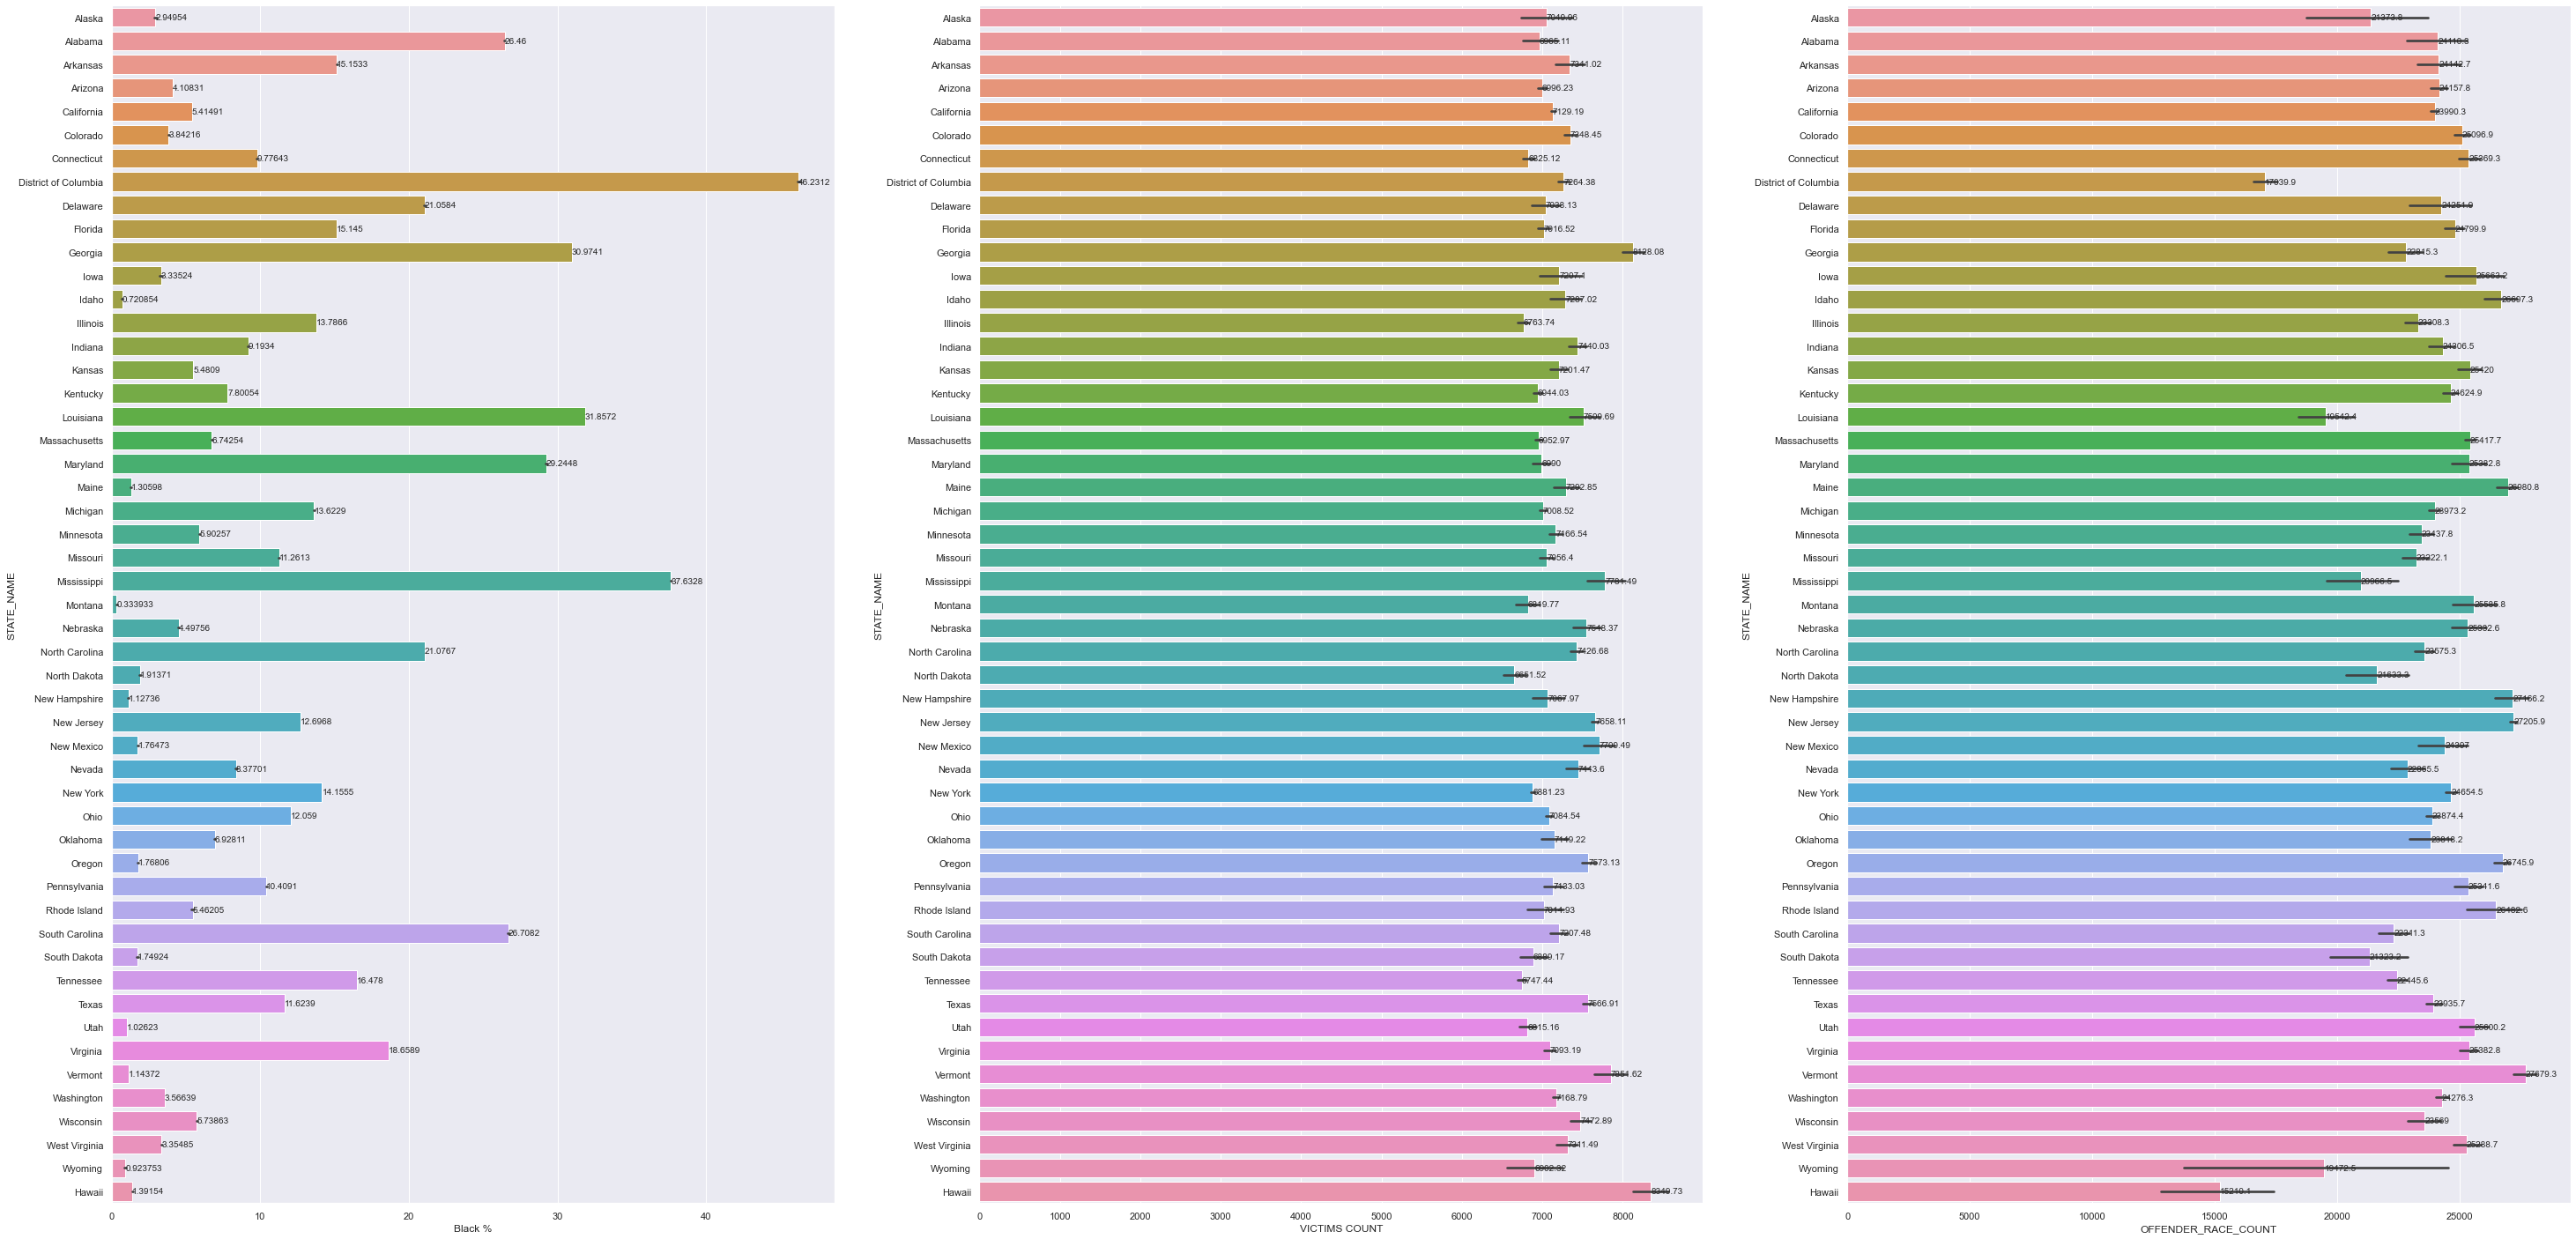

In [11]:
hatecrime_population_black_plot = vis.visualize_hatecrime_population(hatecrime_population, 'black')

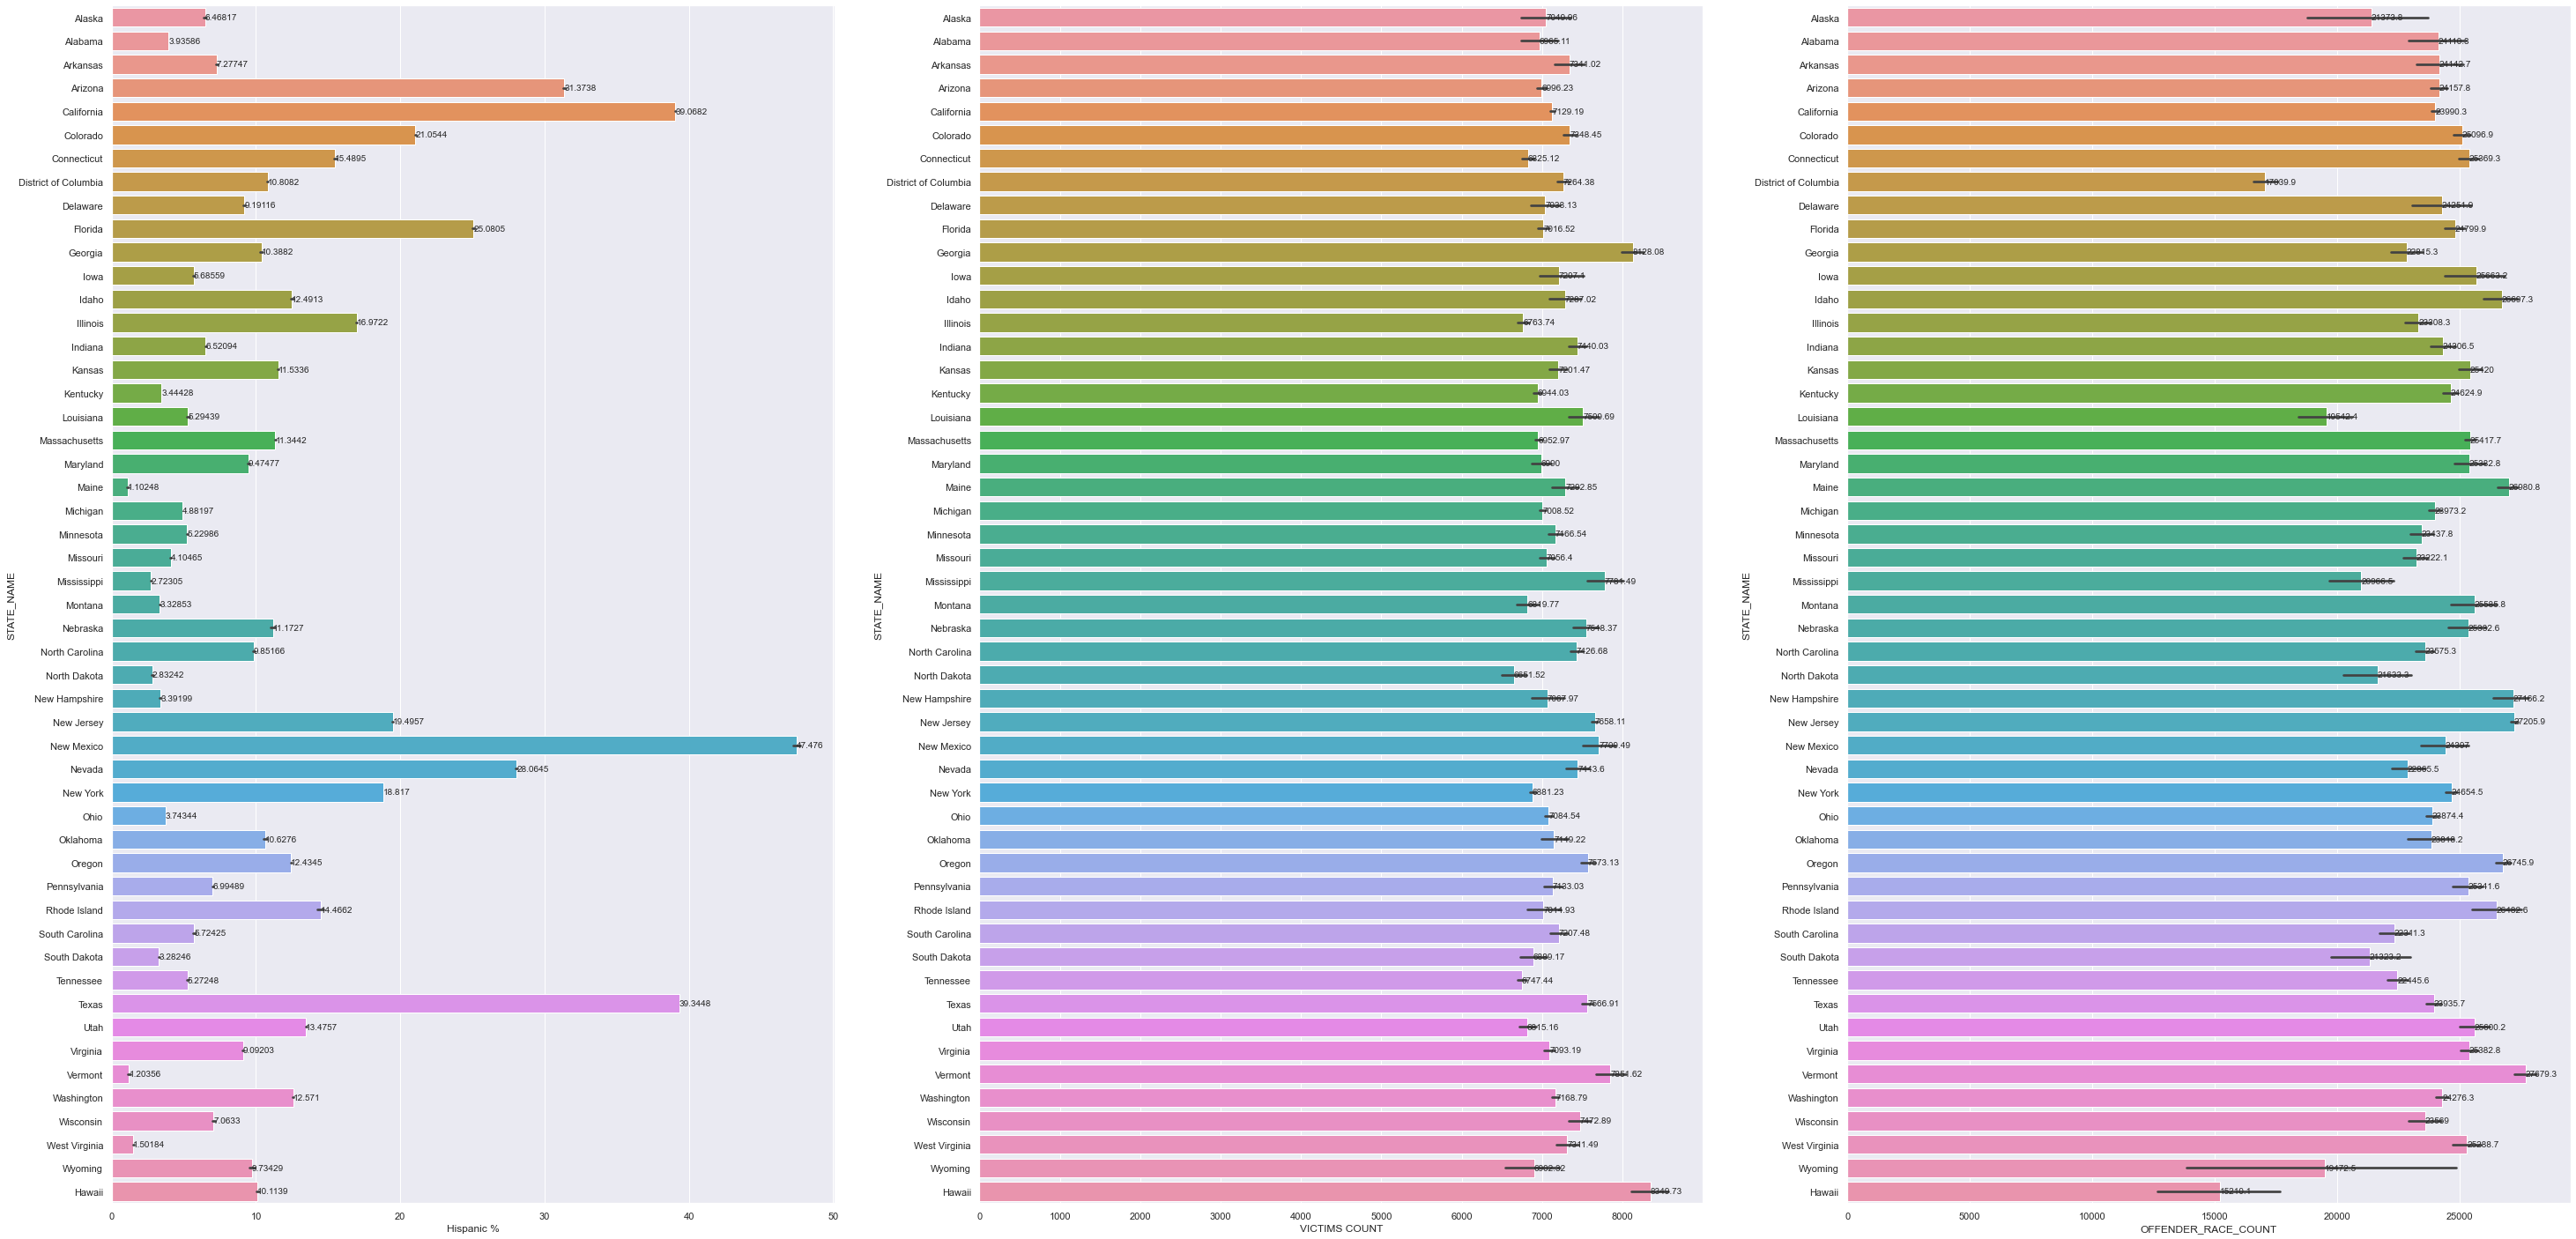

In [12]:
hatecrime_population_hispanic_plot = vis.visualize_hatecrime_population(hatecrime_population, 'hispanic')

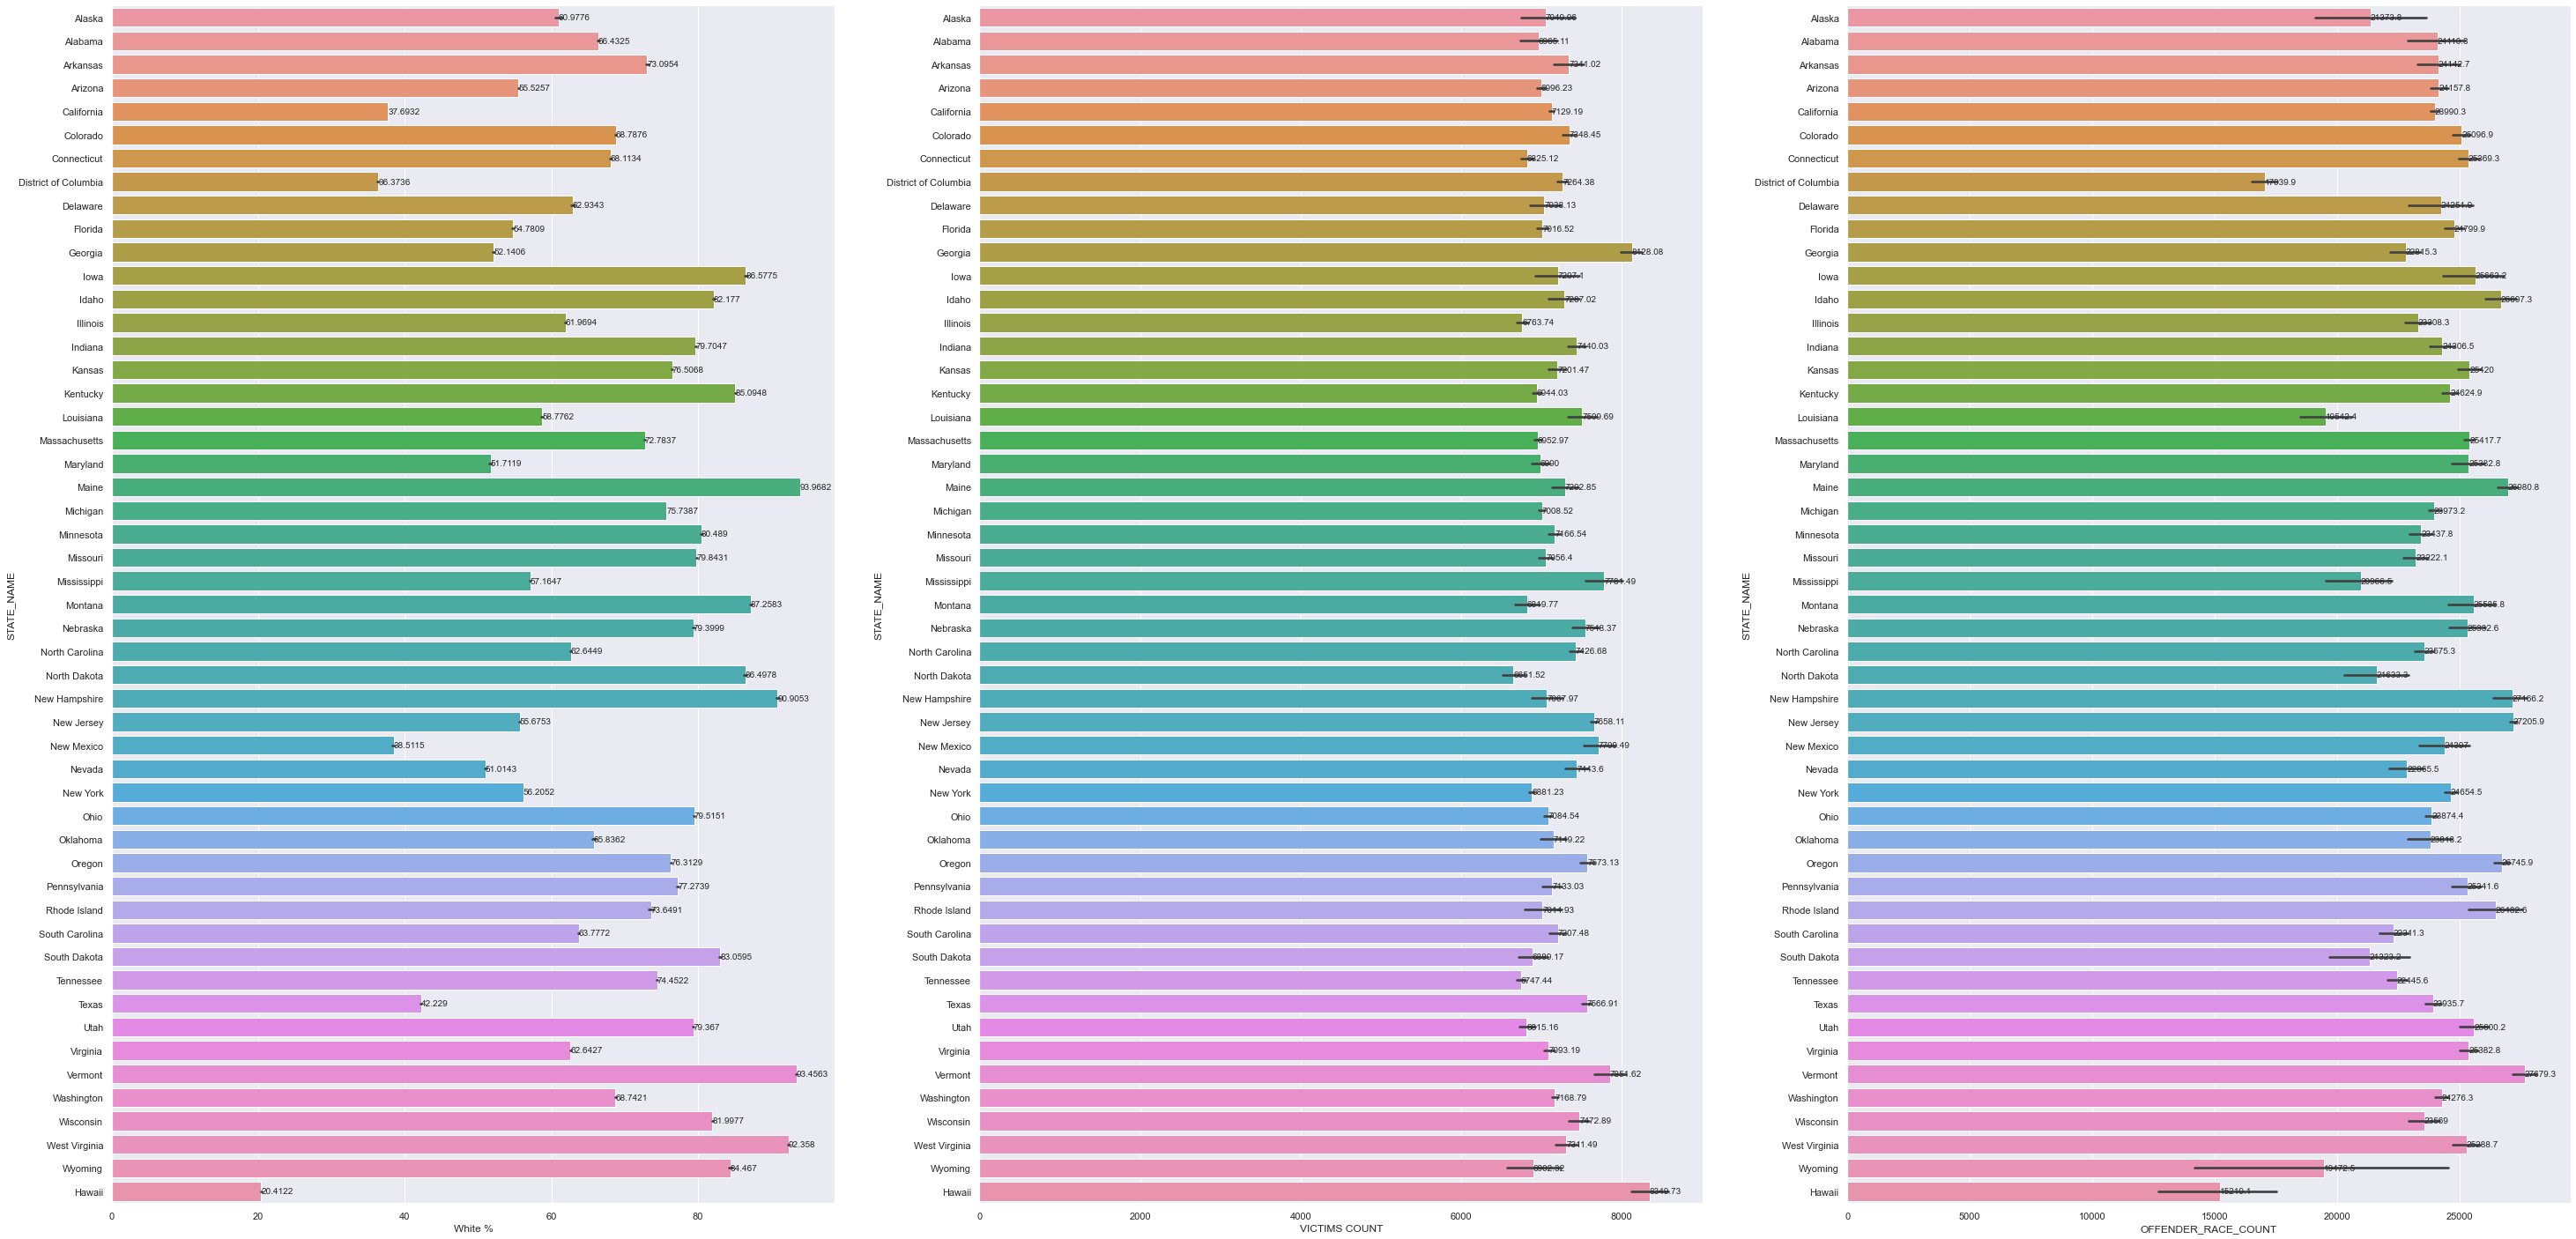

In [13]:
hatecrime_population_white_plot = vis.visualize_hatecrime_population(hatecrime_population, 'white')